In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
df = pd.read_csv('train.csv', skipinitialspace=True) 
#del df['features_duration_ms']

In [3]:
df.dtypes

name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.53600,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.93400,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,0.0397,0.000089,0.80000,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.00127,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.09690,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


In [5]:
df.shape

(15000, 24)

In [6]:
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000
mean,2.468075e+05,27.423667,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647
std,1.279941e+05,18.587534,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616
min,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116
25%,1.800000e+05,14.000000,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953
50%,2.278260e+05,24.000000,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916
75%,2.889030e+05,42.000000,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057
max,4.120258e+06,94.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,4.120258e+06,5.000000,7348.000000,2170.00000,1.000000,4.067086


In [7]:
list(df.columns)

['name',
 'duration_ms',
 'explicit',
 'popularity',
 'artists',
 'album_name',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'features_duration_ms',
 'time_signature',
 'n_beats',
 'n_bars',
 'popularity_confidence',
 'processing',
 'genre']

In [8]:
df.iloc[3]

name                       Can't Look Away
duration_ms                         269800
explicit                             False
popularity                              23
artists                  The Wood Brothers
album_name               One Drop of Truth
danceability                         0.523
energy                               0.585
key                                      5
loudness                            -5.607
mode                                   1.0
speechiness                         0.0765
acousticness                        0.0664
instrumentalness                   0.00127
liveness                             0.117
valence                              0.385
tempo                               140.88
features_duration_ms                269800
time_signature                         4.0
n_beats                              619.0
n_bars                               155.0
popularity_confidence                0.469
processing                        1.279305
genre      

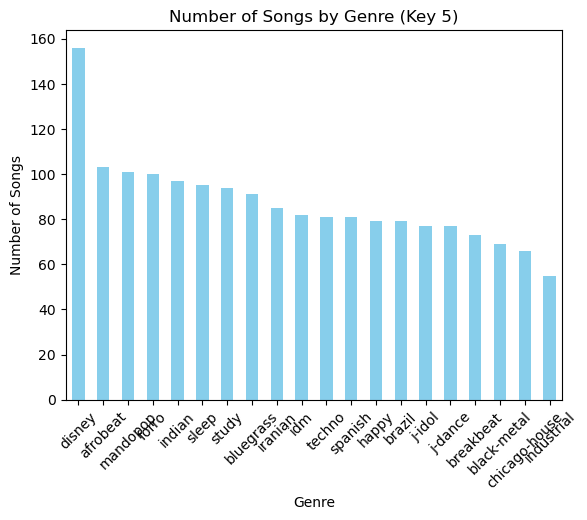

In [9]:
key = df[df['key'] == 0]
genre_counts = key['genre'].value_counts()
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Songs by Genre (Key 5)')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [10]:
BM = df[df['genre'] == 'black-metal']
BM.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,0.0397,0.000089,0.800000,0.2620,0.489,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
9,Into The Pentagram,405800,False,21,Samael,Worship Him,0.311,0.729,4,-7.047,1.0,0.0346,0.000116,0.222000,0.2250,0.119,141.326,405800,4.0,882.0,221.0,NaN,0.916010,black-metal
26,Soim In Vazduh,417025,False,20,Bucovina,Sub Stele,0.497,0.974,0,-5.032,1.0,0.0821,0.000247,0.349000,0.2520,0.232,154.991,417026,NaN,1068.0,269.0,NaN,3.349057,black-metal
37,Despot,361800,False,18,Windir,Likferd,0.318,0.623,2,-5.794,0.0,0.0531,0.000001,0.935000,0.2240,0.192,90.051,361800,4.0,539.0,136.0,NaN,3.700483,black-metal
69,Helligdom Av Døde,377217,False,11,Khold,Svartsyn,0.468,0.661,2,-13.254,NaN,0.0406,0.000078,0.000738,0.0564,0.282,127.906,377218,NaN,793.0,198.0,NaN,3.700483,black-metal


In [11]:
BM.shape

(750, 24)

In [12]:
BMkey1 = BM[BM['key'] == 1]

BMkey1.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
461,Hot Graves,176040,False,21,Midnight,Complete and Total Hell,0.269,0.961,1,-4.095,NaN,0.1710,0.000040,0.70000,0.0488,0.2380,152.464,176040,4.0,445.0,111.0,NaN,2.367412,black-metal
750,Autre temps,350320,False,46,Alcest,Les voyages de l'âme,0.240,0.548,1,-8.378,0.0,0.0325,0.006070,0.87500,0.0941,0.1280,127.337,350320,4.0,664.0,168.0,NaN,2.367412,black-metal
879,Grenzgænger,452626,False,17,Agrypnie,Grenzgaenger,0.466,0.962,1,-4.444,NaN,0.0817,0.000035,0.48200,0.3570,0.2900,120.009,452627,4.0,899.0,227.0,NaN,2.367412,black-metal
913,Solar Empire,315786,False,21,Hypocrisy,A Taste of Extreme Divinity,0.127,0.983,1,-3.909,1.0,0.1090,0.000002,0.67500,0.3300,0.0585,97.631,315787,1.0,625.0,157.0,NaN,2.367412,black-metal
951,A Burden,109293,False,0,Portrayal of Guilt,Let Pain Be Your Guide,0.227,0.991,1,-4.537,NaN,0.1540,0.000023,0.00458,0.0580,0.1170,91.042,109293,4.0,164.0,40.0,NaN,2.367412,black-metal


In [13]:
BMkey1.shape

(61, 24)

In [14]:
BMkey1TSnan = BMkey1[BMkey1['time_signature'].isna()]
BMkey1TSnan.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
3949,Maha-Kali,366333,False,39,Dissection,Reinkaos,0.571,0.853,1,-4.733,0.0,0.0303,0.000034,0.1260,0.0919,0.6480,109.019,366333,NaN,648.0,162.0,NaN,2.367412,black-metal
5496,In Blur,329853,False,42,Deafheaven,Infinite Granite,0.343,0.964,1,-4.044,NaN,0.0507,0.014100,0.6940,0.3760,0.4380,168.021,329853,NaN,912.0,228.0,NaN,2.367412,black-metal
7819,In Perennial Twilight,485917,False,17,Warmoon Lord,Battlespells,0.114,0.808,1,-13.192,1.0,0.0534,0.000002,0.2250,0.3130,0.0487,159.719,485918,NaN,1256.0,315.0,NaN,2.367412,black-metal
8393,Strumień Świadomości,195797,True,19,Truchło Strzygi,Gwiezdny Demon,0.276,0.886,1,-6.040,1.0,0.0905,0.000077,0.0378,0.3620,0.3650,94.630,195797,NaN,305.0,75.0,0.226,2.367412,black-metal
12883,hope you never forget,702629,False,35,Sadness,atna,0.380,0.838,1,-7.602,0.0,0.0627,0.553000,0.8090,0.0821,0.1580,140.013,702629,NaN,1630.0,409.0,NaN,2.367412,black-metal


In [15]:
BMkey1TSnan.shape

(7, 24)

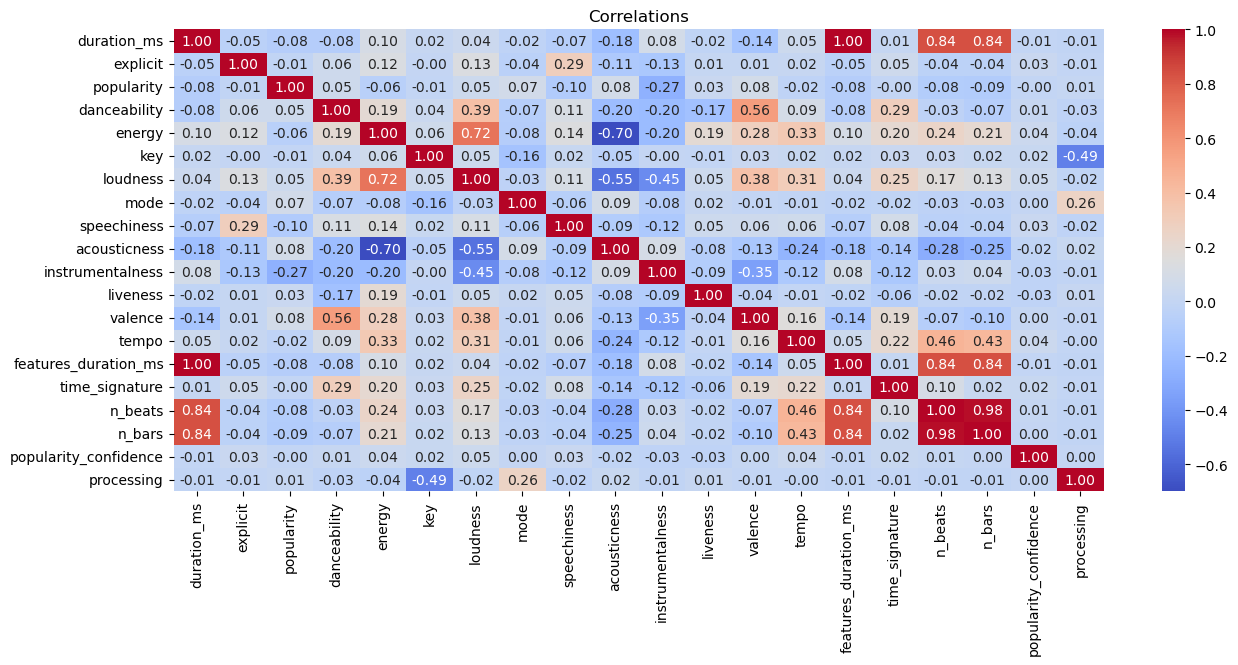

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f", annot=True)

plt.title('Correlations')
plt.show()

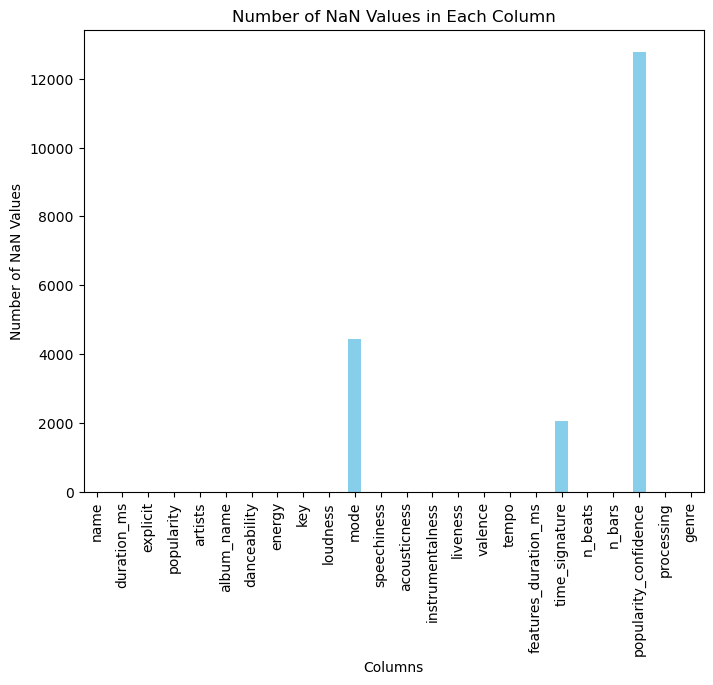

In [17]:
# Calculate the number of NaN values in each column
nan_counts = df.isna().sum()

# Create a bar chart
nan_counts.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')

plt.show()

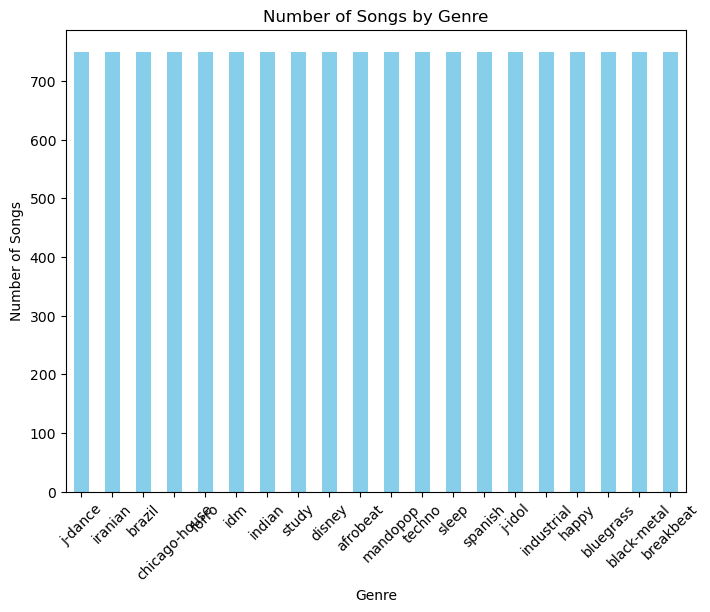

In [18]:
genre_counts = df['genre'].value_counts()

plt.figure(figsize=(8, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [19]:
brazil = df[df['genre'] == 'brazil']
brazil.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
42,Filho de Davi,353986,False,49,Tony Allysson,Poderoso Deus,0.578,0.635,2,-5.335,1.0,0.0278,0.6610,0.000000,0.1380,0.343,137.980,353987,4.0,806.0,202.0,NaN,3.700483,brazil
48,Acalma Minha Tempestade,384850,False,56,Frei Gilson,Eu Vou Crer em Ti,0.538,0.907,10,-6.877,NaN,0.0515,0.0567,0.000009,0.1780,0.345,134.014,384851,4.0,852.0,214.0,NaN,0.757389,brazil
55,E.C.T. - Ao Vivo,210599,False,44,Cássia Eller,Acústico (Ao Vivo),0.666,0.896,7,-8.386,1.0,0.1200,0.6700,0.000003,0.1490,0.633,130.093,210599,NaN,455.0,114.0,NaN,4.067086,brazil
76,River of Grace,232653,False,48,Christy Nockels,Be Held : Lullabies for the Beloved,0.521,0.396,11,-10.654,1.0,0.0468,0.8280,0.000766,0.1000,0.398,77.046,232653,4.0,291.0,72.0,NaN,0.748116,brazil
123,Pai Nosso - Ao Vivo,213866,False,58,Padre Marcelo Rossi,Padre Marcelo Rossi Sem Limite,0.189,0.624,9,-7.389,1.0,0.0450,0.0877,0.000000,0.0628,0.282,183.259,213867,3.0,645.0,215.0,NaN,1.343558,brazil


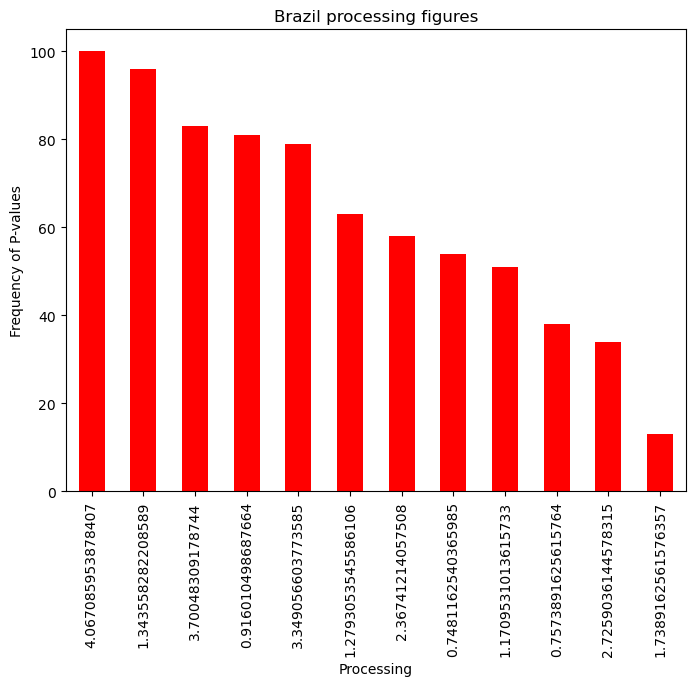

In [20]:
brazil_processing = brazil['processing'].value_counts()

plt.figure(figsize=(8, 6))
brazil_processing.plot(kind='bar', color='red')
plt.title('Brazil processing figures')
plt.xlabel('Processing')
plt.ylabel('Frequency of P-values')

plt.show()


In [21]:
unique_values = df['genre'].unique()
unique_values

array(['j-dance', 'iranian', 'black-metal', 'bluegrass', 'happy',
       'industrial', 'j-idol', 'spanish', 'sleep', 'techno', 'mandopop',
       'afrobeat', 'disney', 'study', 'indian', 'idm', 'forro',
       'chicago-house', 'brazil', 'breakbeat'], dtype=object)

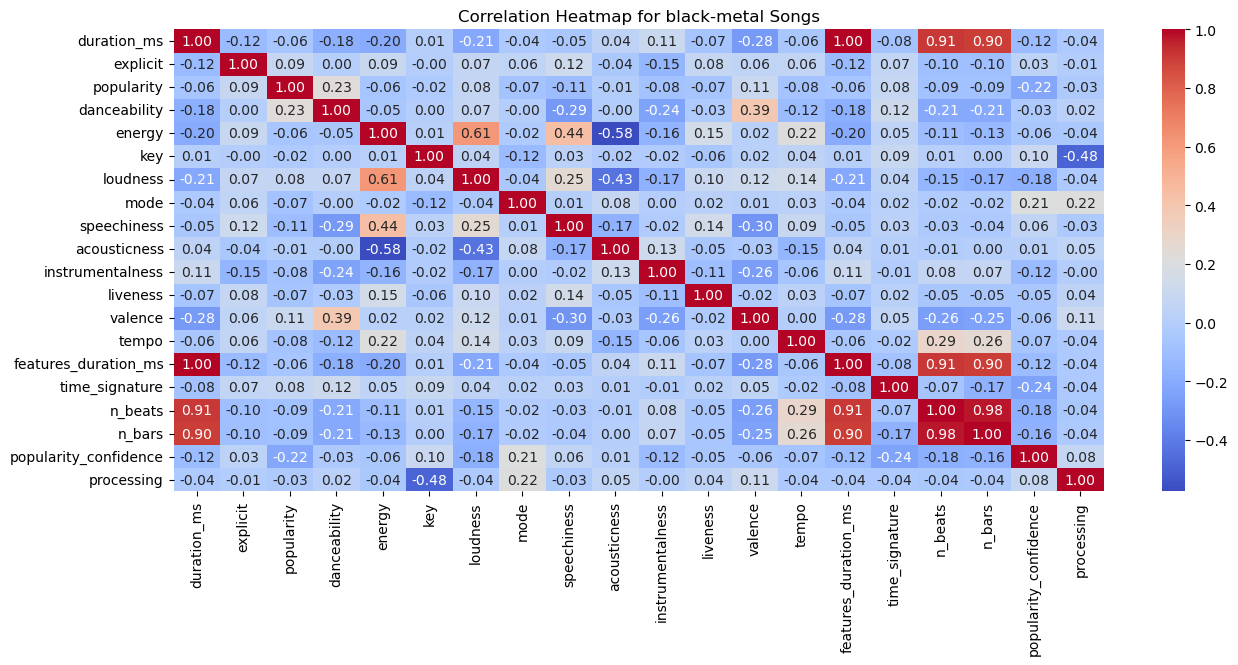

In [22]:
unique_genres = df['genre'].unique()

"""for genre in unique_genres:
    genre_data = df[df['genre'] == genre]
    
    plt.figure(figsize=(6, 4))  # Set the figure size (optional)
    genre_data['processing'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    
    plt.title(f'Processing Distribution for {genre} Songs')
    plt.xlabel('Processing')
    plt.ylabel('Count')
    
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()"""

#for v, in unique_genres:
genre_data = df[df['genre'] == 'black-metal']
plt.figure(figsize=(15, 6))
correlation_matrix = genre_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap for black-metal Songs')
plt.show()

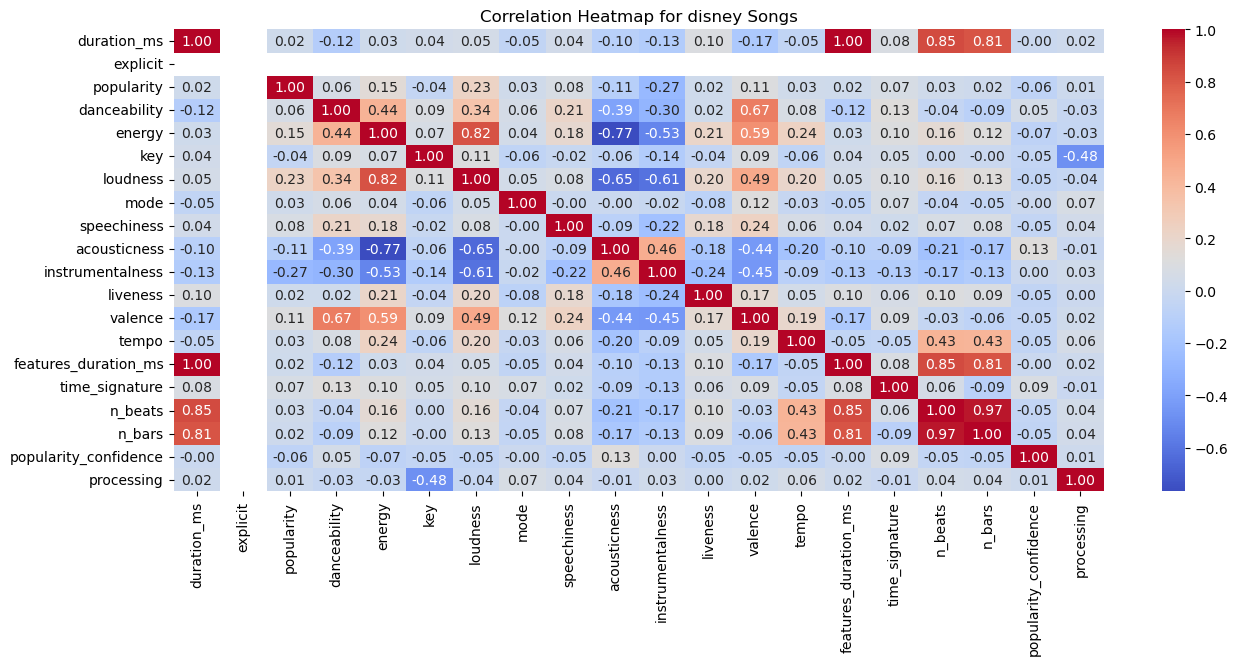

In [23]:
genre_data_disney = df[df['genre'] == 'disney']
plt.figure(figsize=(15, 6))
correlation_matrix = genre_data_disney.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap for disney Songs')
plt.show()

In [24]:
nonan = df.dropna(subset=['popularity_confidence'])
nonan.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,0.0765,0.06640,0.001270,0.1170,0.385,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
36,Wir Ziehen Heut Abend Auf's Dach,210306,False,26,Jürgen Drews,Musik Box Teil 1,0.631,0.925,7,-5.591,0.0,0.0761,0.62700,0.000004,0.4930,0.799,124.061,210307,NaN,426.0,107.0,0.690,4.067086,happy
47,Long Hot Summer Days,288760,False,32,John Hartford,Mark Twang,0.591,0.177,9,-17.299,1.0,0.0811,0.92600,0.001060,0.2940,0.522,70.959,288760,NaN,341.0,86.0,0.353,1.343558,bluegrass
49,Cloudy Daze - Ham Mix,323928,False,23,Bang!,Cloudy Daze,0.593,0.588,10,-14.420,NaN,0.0430,0.00315,0.124000,0.0639,0.328,169.857,323928,4.0,900.0,225.0,0.525,0.757389,happy
52,The Potters Hand,256093,False,43,Hillsong Worship,Ultimate Worship Vol 1,0.301,0.456,7,-6.606,1.0,0.0259,0.34000,0.000002,0.2050,0.193,74.590,256093,NaN,311.0,76.0,0.786,4.067086,iranian


In [25]:
nonan_sorted = nonan.sort_values(by='popularity', ascending=False)
nonan_sorted.head(10)

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
5807,Volví,230125,True,81,Aventura;Bad Bunny,Volví,0.725,0.860,1,-3.726,NaN,0.1820,0.4220,0.000284,0.0674,0.791,175.896,230125,NaN,668.0,168.0,0.960,2.367412,spanish
285,Baarishein,207309,False,81,Anuv Jain,Baarishein,0.475,0.124,2,-9.463,NaN,0.0444,0.9260,0.000000,0.0972,0.190,94.420,207310,4.0,283.0,70.0,0.122,3.700483,indian
10034,Your Love (9PM),150052,False,80,ATB;Topic;A7S,Your Love (9PM),0.669,0.784,7,-5.603,1.0,0.1120,0.1940,0.000006,0.1150,0.517,125.993,150053,4.0,309.0,76.0,0.923,4.067086,techno
4731,No Guidance (feat. Drake),260640,True,80,Chris Brown;Drake,Indigo,0.696,0.454,1,-6.756,0.0,0.1530,0.1230,0.000000,0.1550,0.136,92.928,260640,4.0,399.0,101.0,0.417,2.367412,breakbeat
946,No Diggity,304600,False,80,Blackstreet;Dr. Dre;Queen Pen,Another Level,0.867,0.646,1,-4.674,0.0,0.2880,0.3030,0.000000,0.2790,0.670,88.634,304600,4.0,450.0,112.0,0.215,2.367412,j-dance
13989,Tum Se Hi,321225,False,79,Pritam;Mohit Chauhan,Jab We Met,0.609,0.538,6,-7.842,1.0,0.0273,0.3280,0.000000,0.1250,0.608,130.015,321225,4.0,694.0,173.0,0.809,1.170953,indian
10728,"Tere Hawaale (From ""Laal Singh Chaddha"")",346290,False,79,Pritam;Arijit Singh;Shilpa Rao,"Tere Hawaale (From ""Laal Singh Chaddha"")",0.589,0.522,9,-10.649,NaN,0.0391,0.6420,0.000027,0.0992,0.310,109.094,346291,4.0,618.0,155.0,0.223,1.343558,indian
524,Hear Me Now,194840,False,78,Alok;Zeeba;Bruno Martini,Hear Me Now (feat. Zeeba),0.778,0.463,11,-7.603,1.0,0.0389,0.5460,0.002890,0.0731,0.496,121.999,194840,4.0,386.0,96.0,0.593,0.748116,chicago-house
11512,Kesariya,268164,False,78,Pritam;Arijit Singh;Amitabh Bhattacharya,Brahmastra (Original Motion Picture Soundtrack),0.577,0.574,0,-6.525,NaN,0.0278,0.5720,0.000000,0.1000,0.436,94.009,268165,4.0,414.0,103.0,0.883,3.349057,indian
8700,Atrévete-Te-Te,239306,True,78,Calle 13,Calle 13 (Explicit Version),0.829,0.878,9,-5.951,NaN,0.1010,0.0959,0.000000,0.7760,0.883,87.991,239307,4.0,349.0,87.0,0.379,1.343558,afrobeat


In [26]:
nonan.shape

(2217, 24)

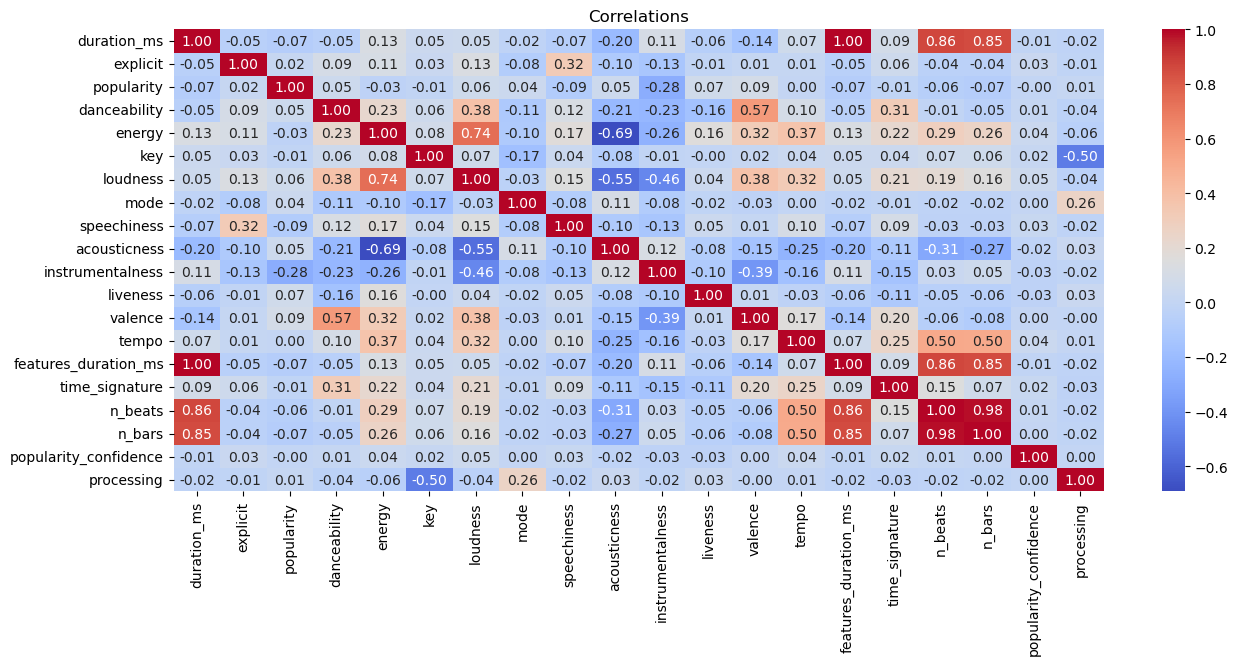

In [27]:
plt.figure(figsize=(15,6))
sns.heatmap(nonan.corr(), cmap='coolwarm', fmt=".2f", annot=True)

plt.title('Correlations')
plt.show()

In [28]:
mostpopular = df[df['popularity'] > 80]
mostpopular.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
285,Baarishein,207309,False,81,Anuv Jain,Baarishein,0.475,0.124,2,-9.463,NaN,0.0444,0.9260,0.000000,0.0972,0.190,94.420,207310,4.0,283.0,70.0,0.122,3.700483,indian
1570,Devuélveme a mi chica,194866,False,81,Hombres G,Hombres G (Edición 30 Aniversario),0.603,0.843,9,-7.597,0.0,0.0557,0.0031,0.033700,0.4450,0.503,172.676,194867,4.0,543.0,137.0,NaN,1.343558,spanish
1701,Love You Like A Love Song,188453,False,83,Selena Gomez & The Scene,When The Sun Goes Down,0.858,0.678,1,-3.870,0.0,0.0469,0.0761,0.000000,0.0741,0.922,117.009,188453,4.0,360.0,89.0,NaN,2.367412,breakbeat
2438,This Girl (Kungs Vs. Cookin' On 3 Burners),195546,False,81,Kungs;Cookin' On 3 Burners,Layers,0.792,0.717,0,-4.759,0.0,0.0393,0.0927,0.000036,0.2260,0.466,121.985,195547,NaN,392.0,97.0,NaN,3.349057,chicago-house
2529,CUFF IT,225388,True,88,Beyoncé,RENAISSANCE,0.780,0.689,7,-5.668,1.0,0.1410,0.0368,0.000010,0.0698,0.642,115.042,225389,NaN,432.0,107.0,NaN,4.067086,breakbeat


In [29]:
mostpopular.shape

(22, 24)

In [30]:
mostpopular_sorted = mostpopular.sort_values(by='popularity', ascending=False)
mostpopular_sorted.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
5892,Clean White Noise - Loopable with no fade,90228,False,94,White Noise Baby Sleep;White Noise for Babies,Best White Noise for Baby Sleep - Loopable wit...,0.000,0.00342,8,-28.460,1.0,0.0000,0.79100,1.000000,0.1110,0.000,0.000,90228,0.0,0.0,0.0,NaN,2.725904,sleep
9631,That's What I Like,206693,False,88,Bruno Mars,24K Magic,0.853,0.56000,1,-4.961,NaN,0.0406,0.01300,0.000000,0.0944,0.860,134.066,206693,4.0,457.0,114.0,NaN,2.367412,breakbeat
2529,CUFF IT,225388,True,88,Beyoncé,RENAISSANCE,0.780,0.68900,7,-5.668,1.0,0.1410,0.03680,0.000010,0.0698,0.642,115.042,225389,NaN,432.0,107.0,NaN,4.067086,breakbeat
14482,Uptown Funk (feat. Bruno Mars),269666,True,85,Mark Ronson;Bruno Mars,Uptown Special,0.856,0.60900,0,-7.223,NaN,0.0824,0.00801,0.000082,0.0344,0.928,114.988,269667,4.0,511.0,128.0,NaN,3.349057,breakbeat
2952,Don't Start Now,183290,False,85,Dua Lipa,Future Nostalgia,0.793,0.79300,11,-4.521,0.0,0.0830,0.01230,0.000000,0.0951,0.679,123.950,183290,4.0,371.0,92.0,NaN,0.748116,breakbeat


In [31]:
mostpopular_sorted_nonan = mostpopular_sorted.dropna(subset=['popularity_confidence'])
mostpopular_sorted_nonan.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
5807,Volví,230125,True,81,Aventura;Bad Bunny,Volví,0.725,0.860,1,-3.726,NaN,0.1820,0.422,0.000284,0.0674,0.791,175.896,230125,NaN,668.0,168.0,0.960,2.367412,spanish
285,Baarishein,207309,False,81,Anuv Jain,Baarishein,0.475,0.124,2,-9.463,NaN,0.0444,0.926,0.000000,0.0972,0.190,94.420,207310,4.0,283.0,70.0,0.122,3.700483,indian


In [32]:
#sns.set(style="ticks")
#sns.pairplot(df, kind='scatter')

#plt.show()

In [33]:
#unique_genres = df['genre'].unique()
#unique_genres.show


In [34]:
df.head(100)

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.6900,0.513,5,-12.529,1.0,0.0975,0.302000,0.536000,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.0690,0.196,1,-24.801,0.0,0.0805,0.283000,0.934000,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.3630,0.854,2,-7.445,NaN,0.0397,0.000089,0.800000,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.5230,0.585,5,-5.607,1.0,0.0765,0.066400,0.001270,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.6430,0.687,7,-11.340,1.0,0.0539,0.000576,0.096900,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Confide,268378,False,34,Technimatic;A Little Sound,Confide,0.2850,0.867,10,-3.650,0.0,0.0465,0.010100,0.000269,0.0887,0.0378,173.818,268378,4.0,752.0,189.0,NaN,0.757389,idm
96,Rockit,155653,False,23,Bad Boy Bill,The Album,0.8660,0.574,7,-7.836,1.0,0.0649,0.001080,0.443000,0.0406,0.6020,127.951,155653,4.0,328.0,81.0,NaN,4.067086,chicago-house
97,My Promiscuous Daughter,196960,False,28,CKY,"Camp Kill Yourself, Vol.1",0.2630,0.767,7,-10.161,NaN,0.0525,0.006960,0.478000,0.3560,0.3080,125.995,196960,4.0,410.0,103.0,NaN,4.067086,industrial
98,Are You Ready (ft. Capital J),171789,False,14,Bassnectar;Capital J,Cozza Frenzy,0.4710,0.731,1,-6.222,1.0,0.0921,0.000248,0.731000,0.1950,0.6670,94.511,171789,4.0,256.0,63.0,NaN,2.367412,breakbeat


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

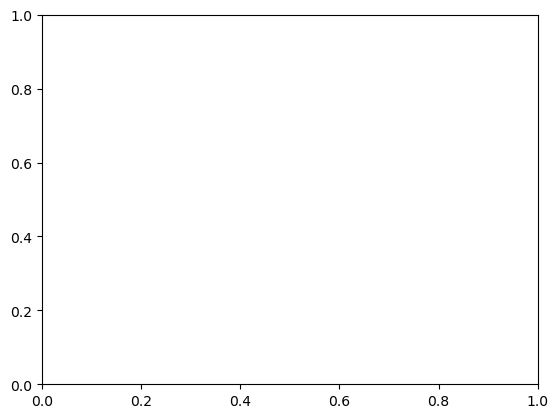

In [35]:
#sns.pairplot(df.head(100))

#plt.show()

boxplot = df.boxplot(column=['genre'], by='mode')
plt.shot()